In [1]:
import os
from typing import List

import cv2
import matplotlib.pyplot as plt
import numpy as np
from facenet_pytorch import MTCNN
from emotiefflib.facial_analysis import EmotiEffLibRecognizer, get_model_list

In [3]:
def recognize_faces(frame: np.ndarray, device: str) -> List[np.ndarray]:
    def detect_face(frame: np.ndarray):
        mtcnn = MTCNN(keep_all=False, post_process=False, min_face_size=40, device=device)
        bounding_boxes, probs = mtcnn.detect(frame, landmarks=False)
        if probs[0] is None:
            return []
        bounding_boxes = bounding_boxes[probs > 0.9]
        return bounding_boxes

    bounding_boxes = detect_face(frame)
    facial_images = []
    for bbox in bounding_boxes:
        box = bbox.astype(int)
        x1, y1, x2, y2 = box[0:4]
        facial_images.append(frame[y1:y2, x1:x2, :])
    return facial_images

In [2]:
device = "cpu"
model_name = get_model_list()[0]
model_name

'enet_b0_8_best_vgaf'

[[ 1.2283427  -2.9523077   0.4148333   3.8353603  -5.456241    0.83603925
   5.4043193   0.5669528 ]]


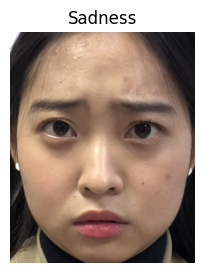

In [ ]:
image = './datasets/images/4001.jpg'
def emotion(image_path:str):
    device = "cpu"
    model_name = get_model_list()[0]
    frame_bgr = cv2.imread(image)
    frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    facial_images = recognize_faces(frame, device)
    fer = EmotiEffLibRecognizer(engine="onnx", model_name=model_name, device=device)

    emotions = []
    for face_img in facial_images:
        emotion, test = fer.predict_emotions(face_img, logits=True)
        print(test)
        emotions.append(emotion[0])
        # plt.figure(figsize=(3, 3))
        # plt.axis('off')
        # plt.imshow(face_img)
        # plt.title(emotion[0])

In [13]:
fer.__dir__()

['is_mtl',
 'idx_to_engagement_class',
 'idx_to_emotion_class',
 'mean',
 'std',
 'img_size',
 'classifier_weights',
 'classifier_bias',
 'ort_session',
 '__module__',
 '__doc__',
 '__init__',
 '_preprocess',
 'extract_features',
 '__abstractmethods__',
 '_abc_impl',
 '_get_probab',
 'classify_emotions',
 'classify_engagement',
 'predict_engagement',
 'predict_emotions',
 '__dict__',
 '__weakref__',
 '__slots__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__getstate__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [15]:
fer.idx_to_emotion_class

{0: 'Anger',
 1: 'Contempt',
 2: 'Disgust',
 3: 'Fear',
 4: 'Happiness',
 5: 'Neutral',
 6: 'Sadness',
 7: 'Surprise'}

In [ ]:
'''
0: '분노',
1: '경멸',
2: '혐오',
3: '두려움',
4: '행복',
5: '보통',
6: '슬픔',
7: '놀람'
'''